In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 1.0, 'Bivariate Analysis')

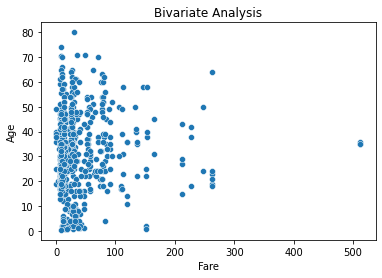

In [3]:
sb.scatterplot(x=df['Fare'], y=df['Age'])
plt.title('Bivariate Analysis')


In [4]:
#get correlation
df[['Fare', 'Age']].corr()

,Fare,Age
Fare,1.000000,0.096067
Age,0.096067,1.000000


<AxesSubplot:>

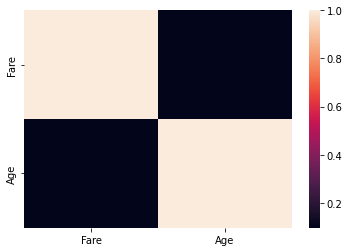

In [7]:
sb.heatmap(df[['Fare', 'Age']].corr())

In [8]:
survived_ratio = df[['Pclass', 'Survived']].groupby('Pclass').sum()
survived_ratio

,Survived
Pclass,
1,136
2,87
3,119


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

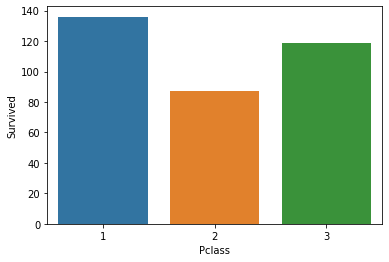

In [9]:
sb.barplot(x=survived_ratio.index, y=survived_ratio['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

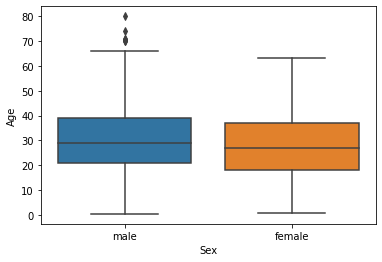

In [10]:
sb.boxplot(x=df['Sex'], y=df['Age'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

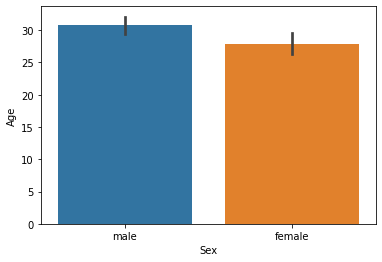

In [11]:
sb.barplot(x=df['Sex'], y=df['Age'])

In [14]:
my_Series = pd.Series([1, 2, 3, 6, 7, 8, 150])
mean = my_Series.mean()
std = my_Series.std()
z_scores = abs((my_Series - mean)/std)
z_scores


0    0.441104
1    0.422941
2    0.404778
3    0.350288
4    0.332125
5    0.313962
6    2.265198
dtype: float64

In [15]:
outliers_removed = my_Series[z_scores <= 1.5]
outliers_removed

0    1
1    2
2    3
3    6
4    7
5    8
dtype: int64

In [17]:
s = pd.Series([1, 2, 3, 6, 7, 8, 150])
mean = s.mean()
std = s.std()
median = np.median(s)
z_scores = abs((s - mean) / std)
median

6.0

In [19]:
s[z_scores > 1.5] = median
s

0    1
1    2
2    3
3    6
4    7
5    8
6    6
dtype: int64

In [20]:
#Categoring by numbers in data frame
df['Sex'].replace({'male':1, 'female':0}, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [21]:
freq = df['Sex'].value_counts()/len(df['Sex'])
freq

1    0.647587
0    0.352413
Name: Sex, dtype: float64

In [23]:
df['Sex'].replace({'male':freq[1], 'female':freq[0]}, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C
